In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sys

sys.path.append('..')
from functions.select_cols_functions import * 
df = pd.read_csv('../../data/train_2_classes.csv')
df_4 = pd.read_csv('../../data/train.csv')
df = apply_all_rules(df)
df_4 = apply_all_rules(df_4)

Ver estrutura

In [14]:
print(df.columns)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


In [15]:
df = df.drop(['Name', 'RescuerID'], axis=1)
df_backup = pd.DataFrame(df)

Exibição histograma de todas as colunas

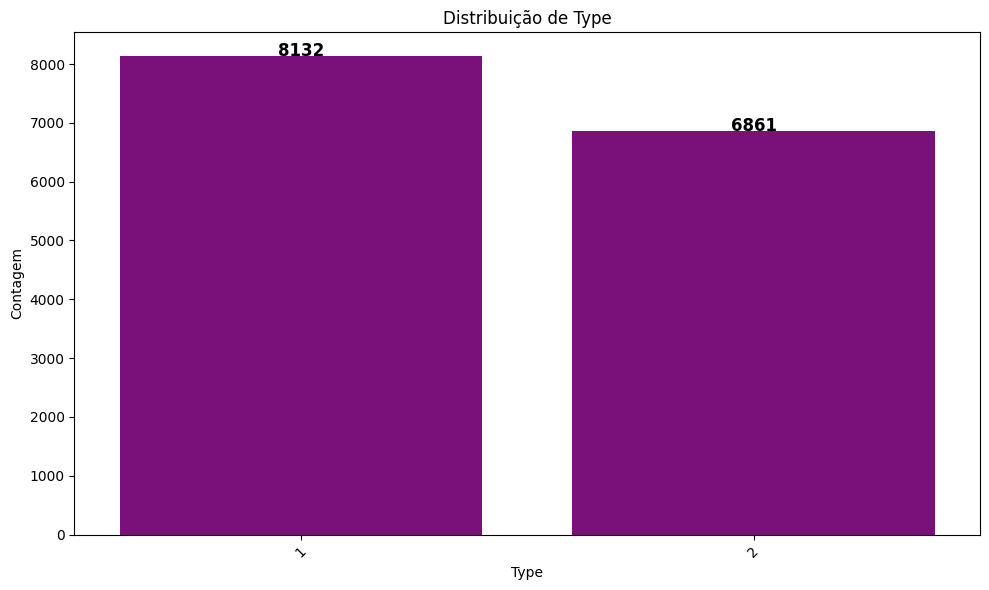

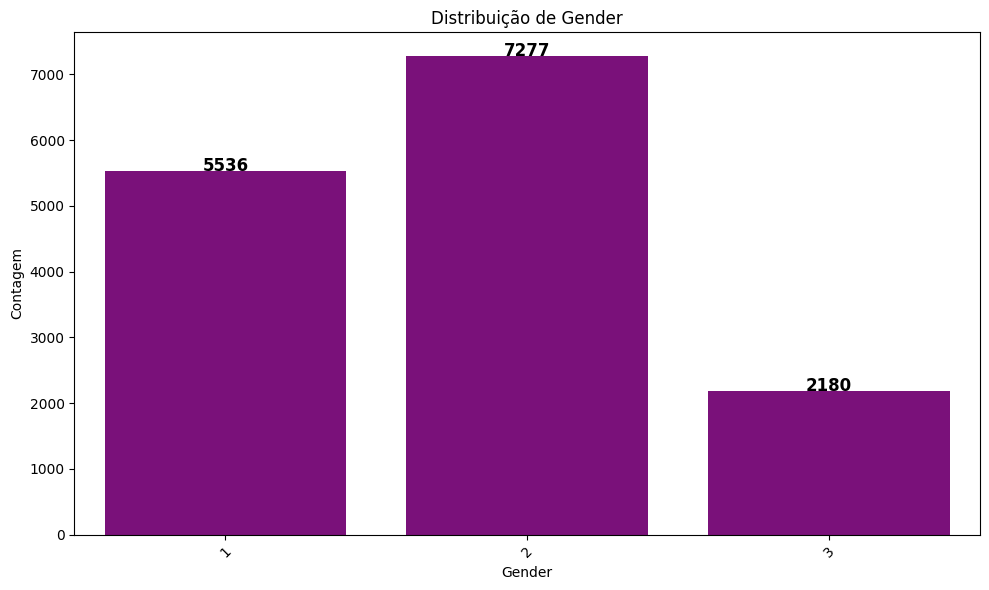

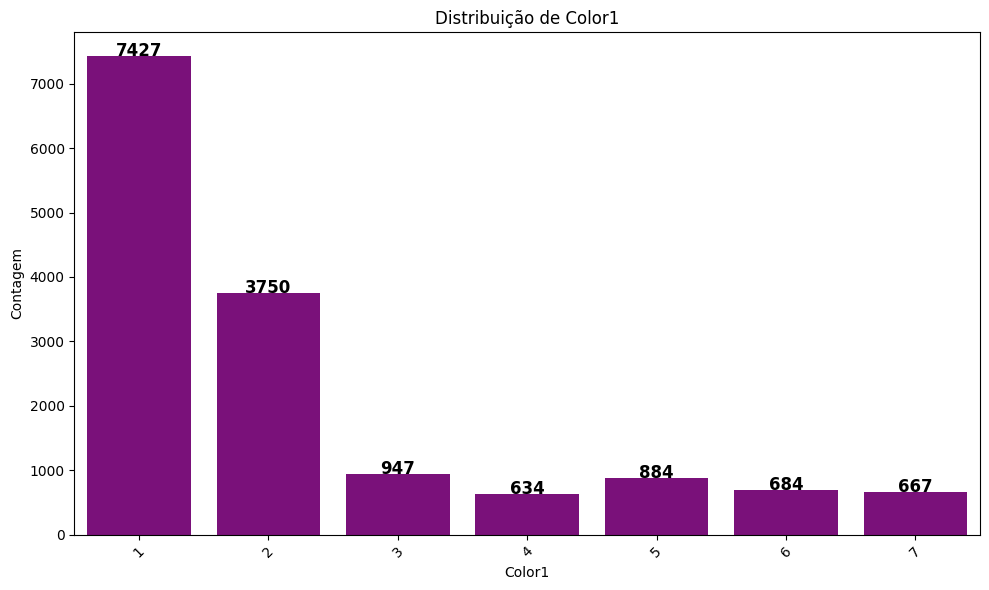

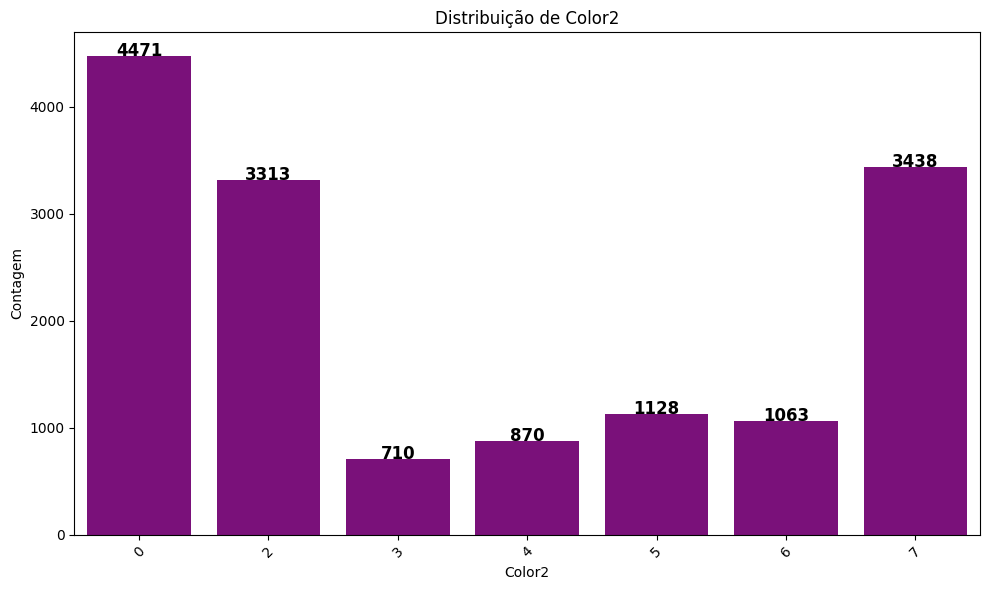

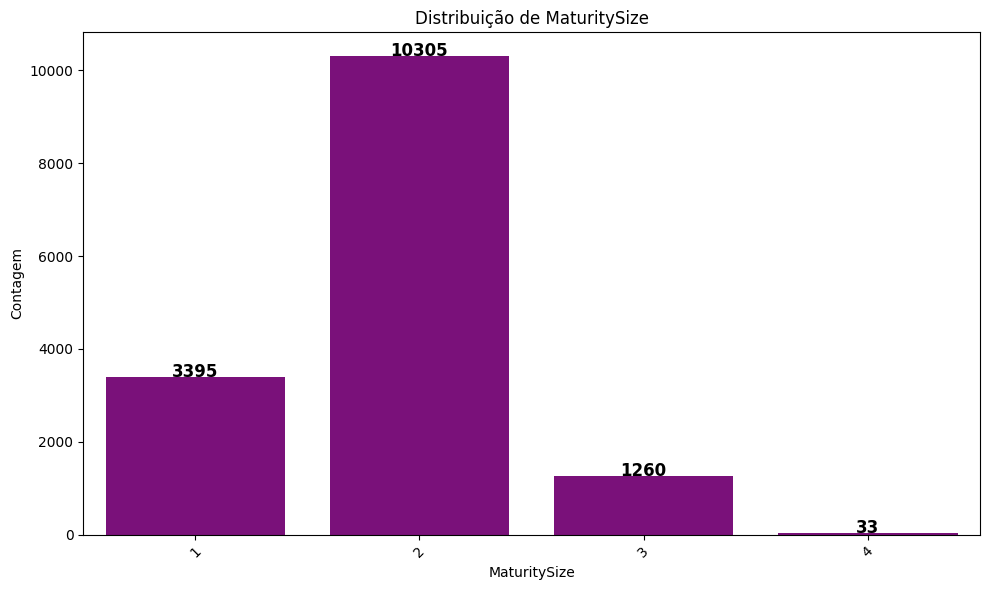

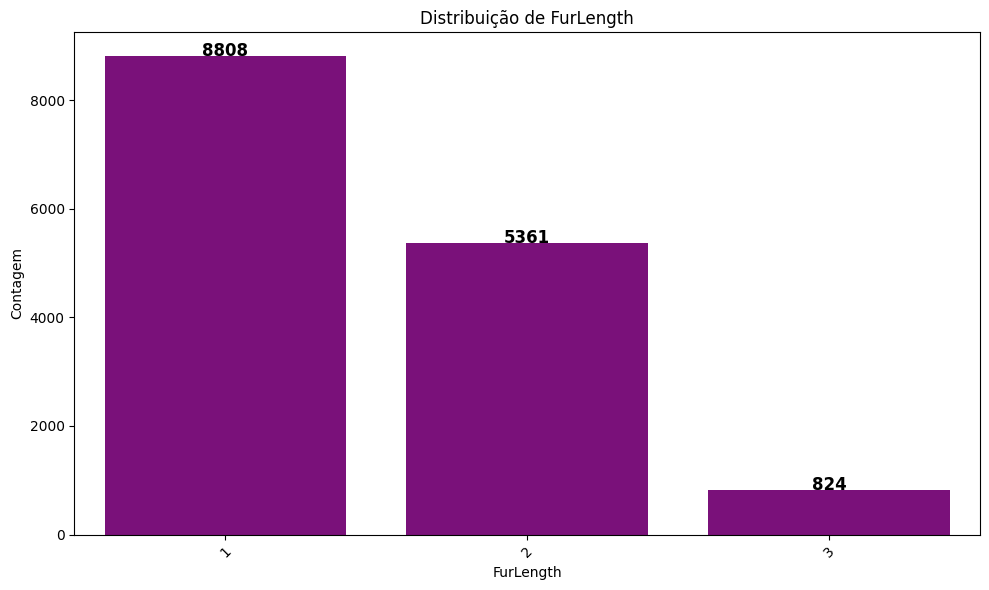

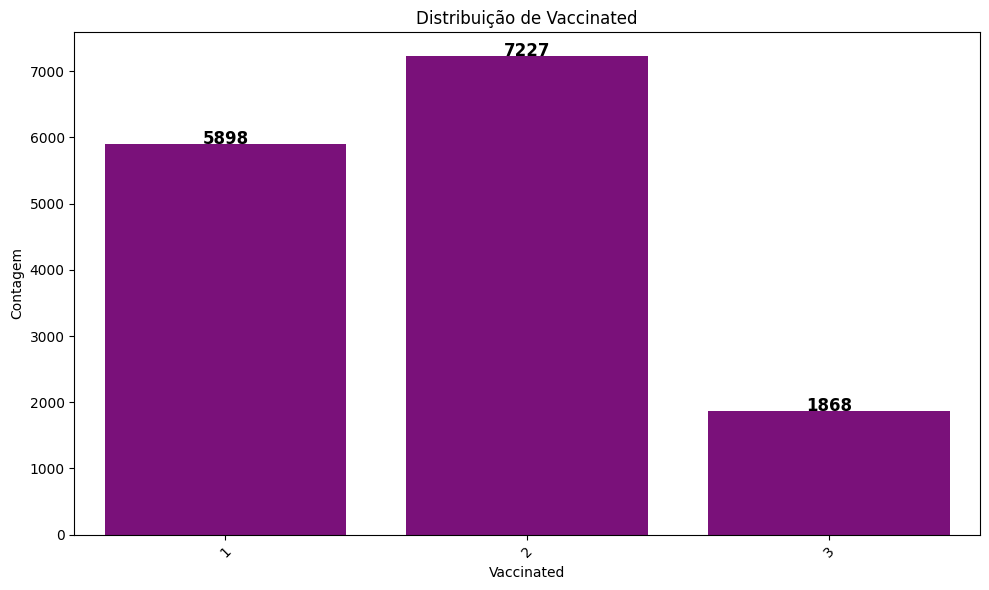

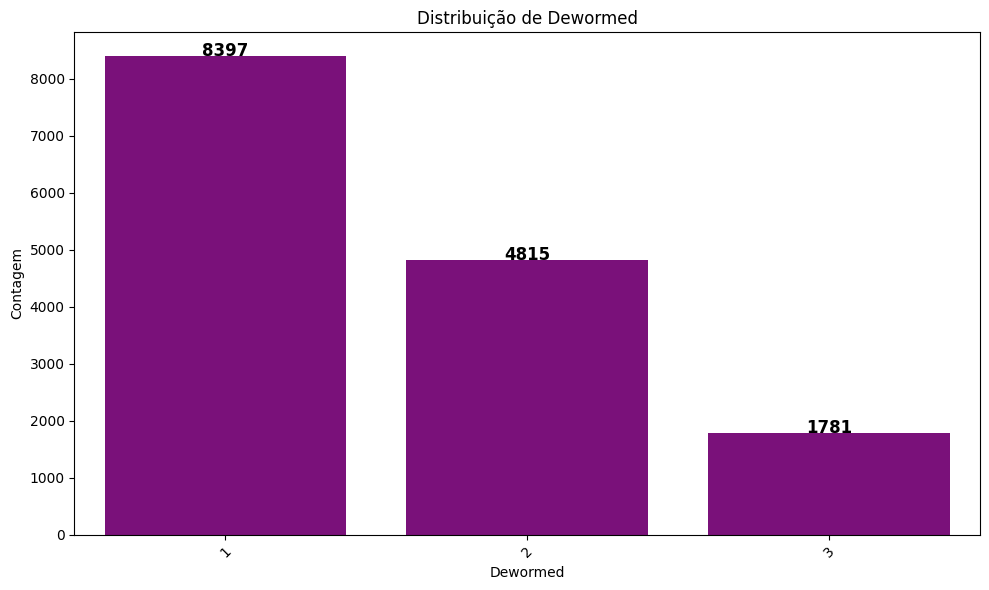

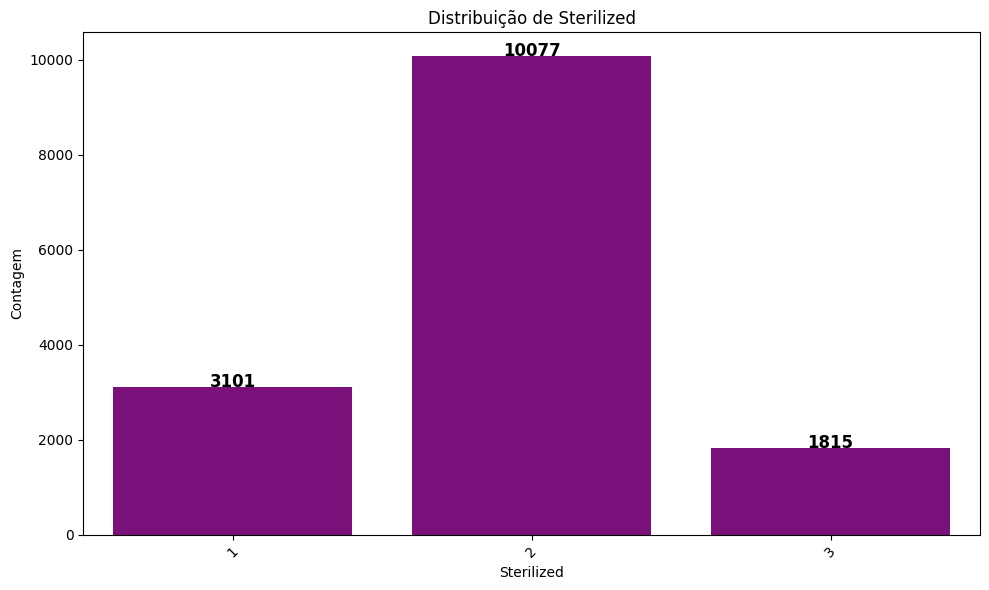

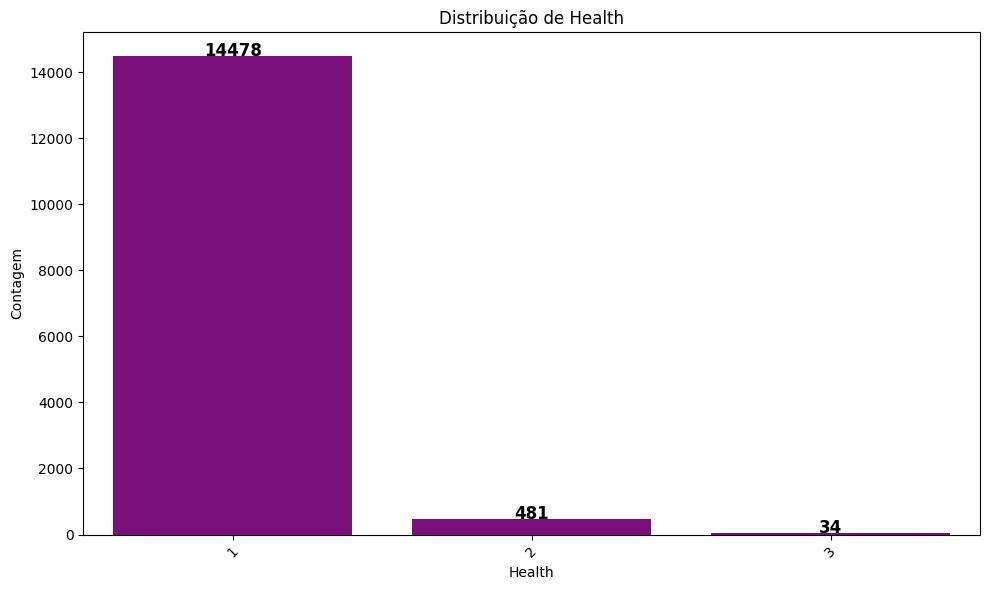

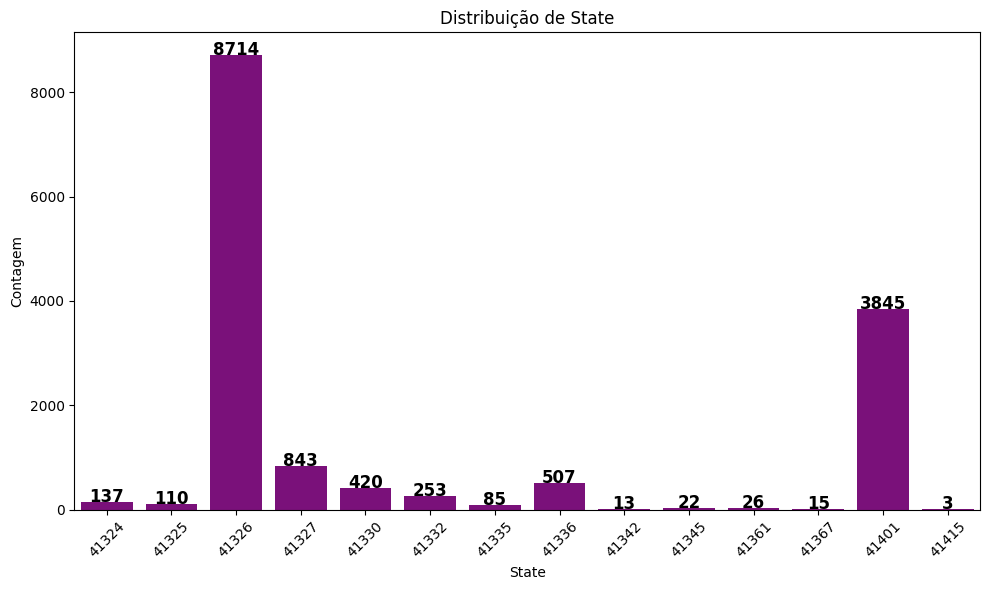

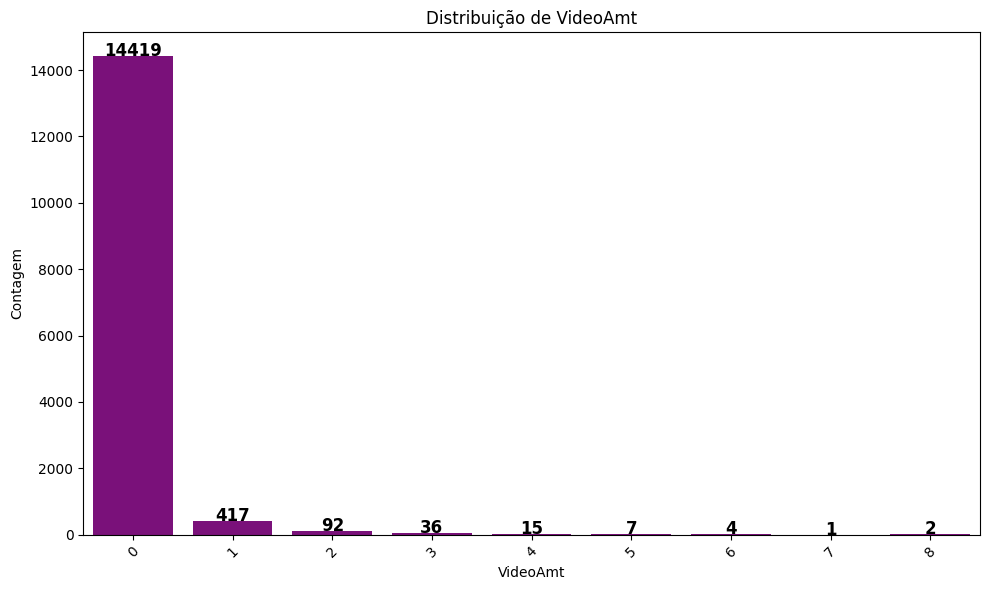

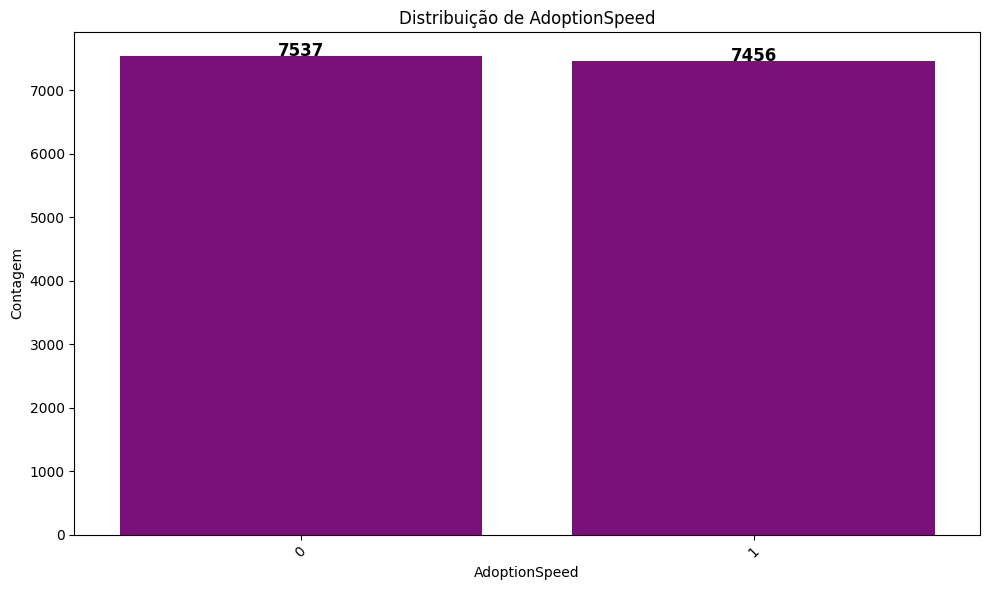

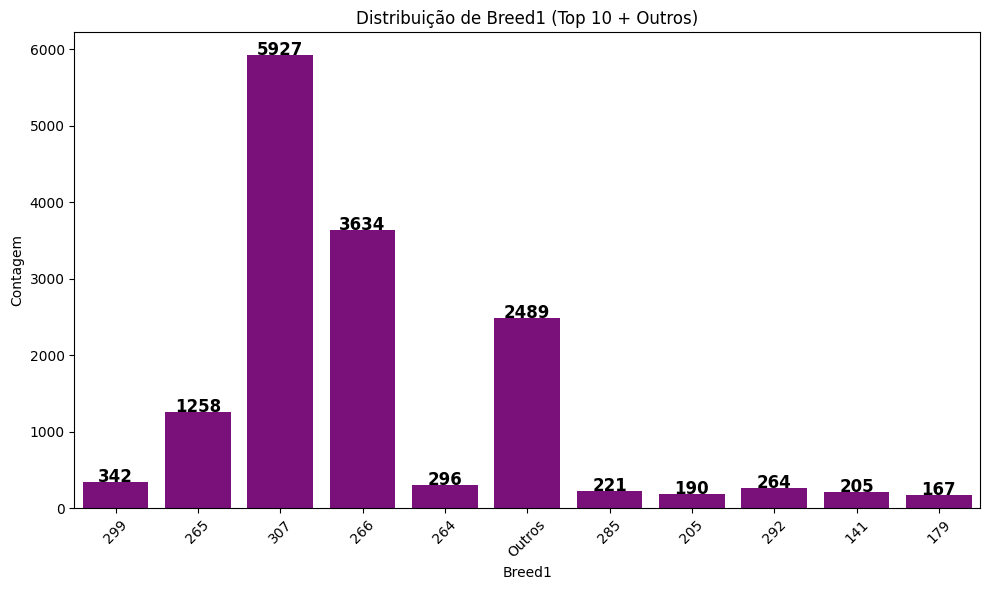

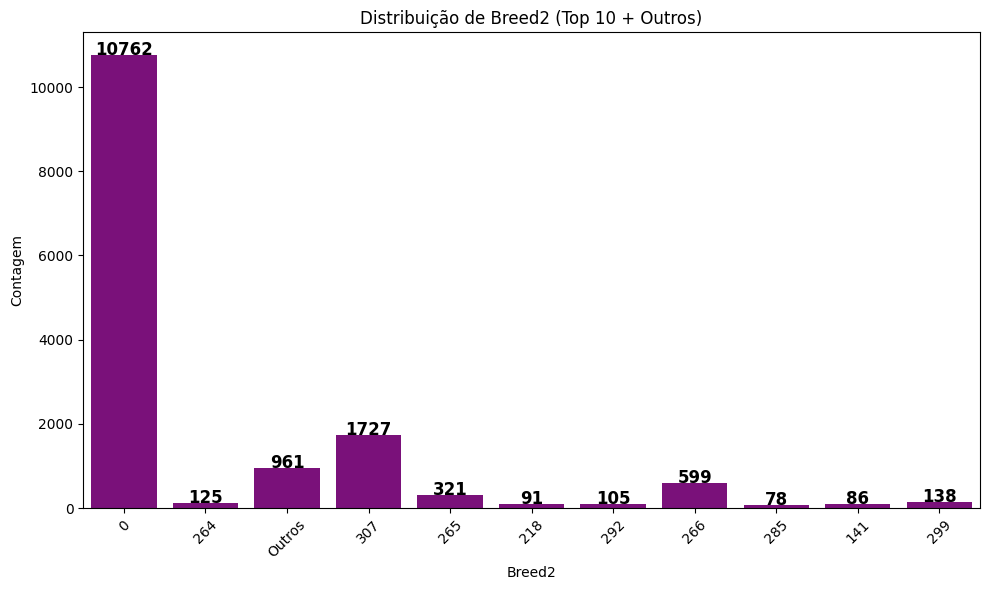

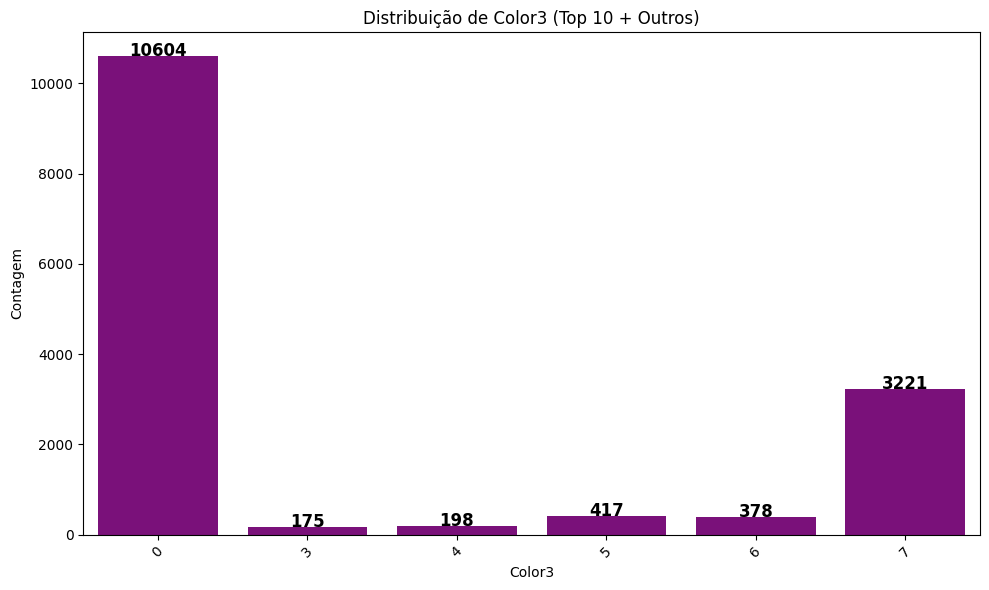

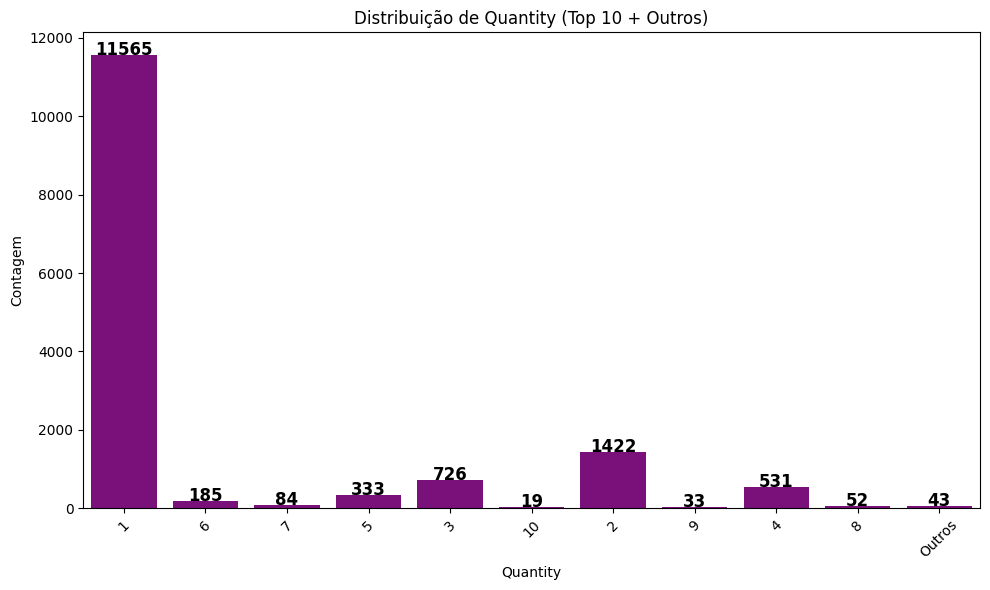

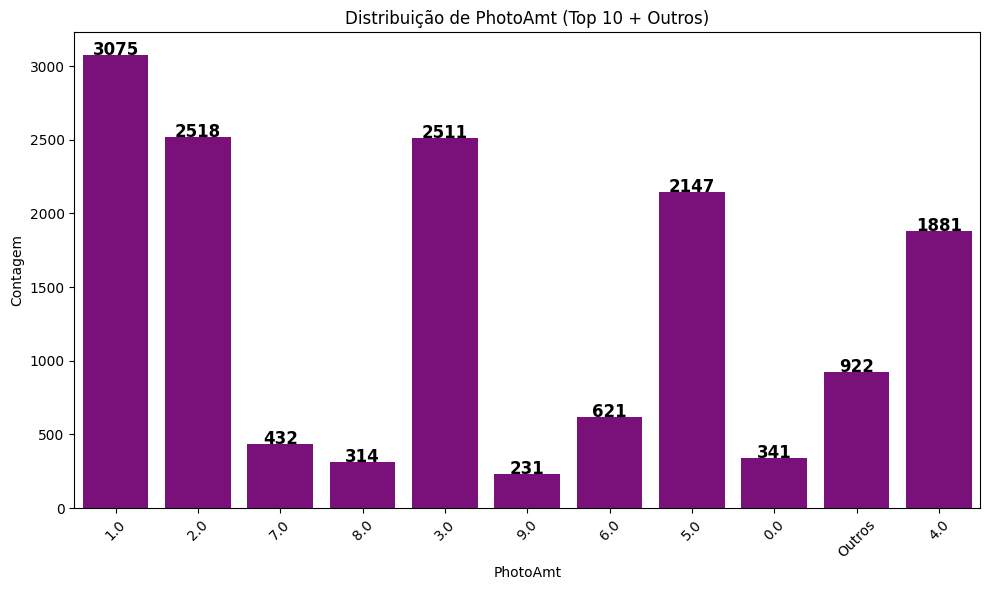

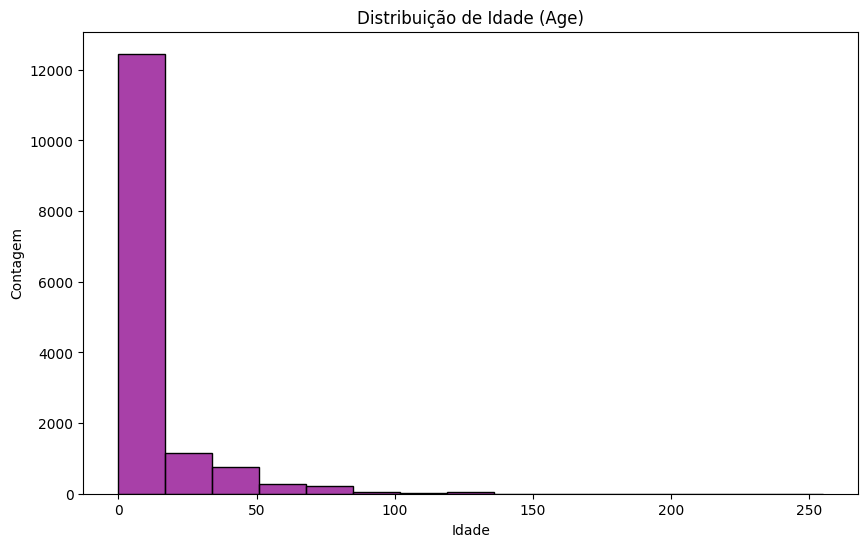

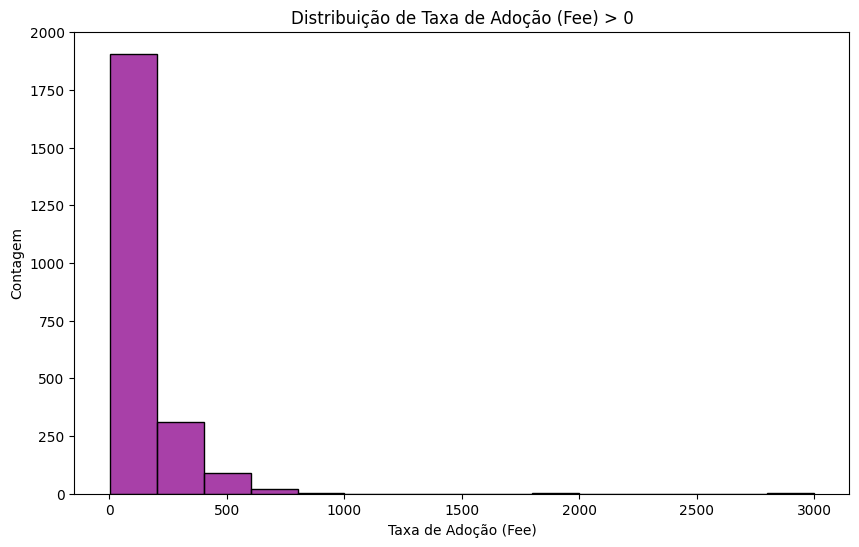

In [16]:
categorical_columns = [
    'Type', 'Gender', 'Color1', 'Color2',
    'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
    'Sterilized', 'Health', 'State', 'VideoAmt', 'AdoptionSpeed'
]

# Colunas com muitas categorias, vamos tratar separadamente
high_cardinality_columns = ['Breed1', 'Breed2', 'Color3', 'Quantity', 'PhotoAmt']

# Número máximo de categorias a serem mostradas
max_categories = 10

# Iterar sobre cada coluna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    sns.set_palette("viridis")  # Define a paleta de cores

    # Cria o gráfico de barras para a coluna atual
    ax = sns.countplot(data=df, x=col, color="#8b008b")

    # Adiciona os números no topo de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, fontweight='bold', color='black')
    
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)  # Rotaciona os rótulos para facilitar a leitura
    plt.tight_layout()  # Ajusta o layout
    plt.show()

# Tratamento separado para colunas com alta cardinalidade
for col in high_cardinality_columns:
    plt.figure(figsize=(10, 6))
    sns.set_palette("viridis")

    # Obter as `max_categories` mais frequentes e agrupar o resto como "Outros"
    top_categories = df[col].value_counts().nlargest(max_categories).index
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Outros')

    # Criar gráfico para essas categorias agrupadas
    ax = sns.countplot(data=df, x=col, color="#8b008b")

    # Adicionar os números no topo das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, fontweight='bold', color='black')

    plt.title(f'Distribuição de {col} (Top {max_categories} + Outros)')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, color="#8b008b")  # `bins` define o número de intervalos
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Fee'] > 0]['Fee'], bins=15, color="#8b008b")  # Filtra apenas valores de Fee > 0
plt.title('Distribuição de Taxa de Adoção (Fee) > 0')
plt.xlabel('Taxa de Adoção (Fee)')
plt.ylabel('Contagem')
plt.show()

In [20]:
# Crie um gráfico 3D
fig = px.scatter_3d(df_4, x='Age', y='Type', z='AdoptionSpeed', 
                     color='AdoptionSpeed', 
                     labels={'Age': 'Idade', 'Type': 'Tipo', 'AdoptionSpeed': 'Adoção'})

fig.update_traces(marker=dict(size=5))
fig.update_layout(title='Visualização 3D da Idade, Taxa e Velocidade de Adoção',
                  scene=dict(xaxis_title='Idade',
                             yaxis_title='Tipo',
                             zaxis_title='Adoção'))

fig.show()